# Machine Learning - Problem Set 1
#### 26/02/2023
### Aditya Narayan Rai (235843)

In [1]:
# First let's import the important packages we are going to use for this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import scipy as sc

In [2]:
# Now let's load the dataset we are going to use for this assignment
anes96 = sm.datasets.anes96
print(anes96.NOTE)

#Note to the Prof: I learnt about this 'NOTE' component on the stackoverflow

::

    Number of observations - 944
    Number of variables - 10

    Variables name definitions::

            popul - Census place population in 1000s
            TVnews - Number of times per week that respondent watches TV news.
            PID - Party identification of respondent.
                0 - Strong Democrat
                1 - Weak Democrat
                2 - Independent-Democrat
                3 - Independent-Indpendent
                4 - Independent-Republican
                5 - Weak Republican
                6 - Strong Republican
            age : Age of respondent.
            educ - Education level of respondent
                1 - 1-8 grades
                2 - Some high school
                3 - High school graduate
                4 - Some college
                5 - College degree
                6 - Master's degree
                7 - PhD
            income - Income of household
                1  - None or less than $2,999
                2  - $3,000-$4,9

In [3]:
# Now, let's load our dataset and save it as a dataframe in Pandas
dataset_anes96 = anes96.load_pandas()
data = dataset_anes96.data

In [4]:
# Now, let's check how the dataset looks like
print(data.shape)

(944, 11)


The dataframe has 944 observations and 11 columns

In [5]:
# Now let's check the first five rows of data
data.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624


In [6]:
# Let's check the data types and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   popul     944 non-null    float64
 1   TVnews    944 non-null    float64
 2   selfLR    944 non-null    float64
 3   ClinLR    944 non-null    float64
 4   DoleLR    944 non-null    float64
 5   PID       944 non-null    float64
 6   age       944 non-null    float64
 7   educ      944 non-null    float64
 8   income    944 non-null    float64
 9   vote      944 non-null    float64
 10  logpopul  944 non-null    float64
dtypes: float64(11)
memory usage: 81.3 KB


Now for the purpose of this assignment, our task is to predict **'vote'** based on the five features: **TVnews, PID, age, educ, and popul**. Therefore, we will remove the non-predictive features from the dataframe: selfLR, ClinLR, DoleLR, income, and logpopul.

In [7]:
data = data.drop(columns=['selfLR', 'ClinLR','DoleLR', 
                         'income', 'logpopul'], axis=1)
data.head()

,popul,TVnews,PID,age,educ,vote
0,0.0,7.0,6.0,36.0,3.0,1.0
1,190.0,1.0,1.0,20.0,4.0,0.0
2,31.0,7.0,1.0,24.0,6.0,0.0
3,83.0,4.0,1.0,28.0,6.0,0.0
4,640.0,7.0,0.0,68.0,6.0,0.0


**Question 1:** Calculate summary statistics for the label and five features described above. Pay attention to the meaning of each variable and present a summary of it that makes sense given how it is coded.

**Solution:**

In [8]:
# Let's calculate the summary statistics of the label - 'vote'
print("Summary Statistics for vote:")
print(data['vote'].describe())

# And also the summary statistics of the features
# But first let's select the five features together
selected_features = ['popul', 'TVnews', 'PID', 'age', 'educ'] 
print("\nSummary Statistics for Features:")
print(data[selected_features].describe())

Summary Statistics for vote:
count    944.000000
mean       0.416314
std        0.493208
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: vote, dtype: float64

Summary Statistics for Features:
             popul      TVnews         PID         age        educ
count   944.000000  944.000000  944.000000  944.000000  944.000000
mean    306.381356    3.727754    2.842161   47.043432    4.565678
std    1082.606745    2.677235    2.273337   16.423130    1.599287
min       0.000000    0.000000    0.000000   19.000000    1.000000
25%       1.000000    1.000000    1.000000   34.000000    3.000000
50%      22.000000    3.000000    2.000000   44.000000    4.000000
75%     110.000000    7.000000    5.000000   58.000000    6.000000
max    7300.000000    7.000000    6.000000   91.000000    7.000000


***Interpretation:*** So, we have a dataframe with 6 variables and 944 observations. Our label - 'vote' is a binary variable, where '0' means expected vote for Clinton and '1' means expected vote for Cole. In our features, 'popul' is the census place population in 1000s and the mean population is approximately 306,000. TVnews depicts the 'Number of times per week that respondent watches TV news' and on average this is close to 4 times. PID is the 'Party Identification of the respondent'. On avearge, the 'age' of the respondent in the dataframe is close to 47 years and 'educ' is the education level of the respondent where it seems that on average, the respondents in the dataframe have some college education.

**Question 2:** What is the formula for the closed form estimate of the coefficient vector in ordinary least squares regression? Estimate the coefficients using numpy in Python by performing the matrix operations from the closed form solution we worked out in class (Page 14 of Lecture 2). (Be sure to include an intercept!)

**Solution:**
Now we know that the closed-form solution for the coefficients in ordinary least squares (OLS) regression can be expressed as:

$$ \hat{\beta} = (X^TX)^{-1}X^TY $$
Here, $\hat{\beta}$ is the estimated coefficient vector, $X$ is the design matrix, $Y$ is the response vector and $(X^TX)^{-1}$ the inverse of the matrix product of $X$ and $X^T$



In [9]:
# First let's define our label and the five features
#selected_features = ['popul', 'TVnews', 'PID', 'age', 'educ'] - this is already done

label = 'vote'

# Now, let's add a constant term to the features for the intercept and define them as X and y
X = sm.add_constant(data[selected_features])

y = data[label]

# Now let's do the matrix operations for the closed-form solution
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# And finally check the estimated coefficients
print("Estimated Coefficients:")
print(beta)

Estimated Coefficients:
0   -1.602317e-01
1    4.667631e-08
2    1.733595e-03
3    1.727703e-01
4    1.356057e-03
5    3.336629e-03
dtype: float64


**Question 3:** Estimate the coefficients using the statsmodels package (sm.OLS documentation). Compare them.

**Solution:**

In [10]:
# First, let's estimate the coefficients
coefficients = sm.OLS(y, X).fit().params

# Now, let's check the estimated coefficients
print("Estimated Coefficients:")
print(coefficients)

# Note to the Prof: I used Google and ChatGPT to understand the use of 'params' here.

Estimated Coefficients:
const    -1.602317e-01
popul     4.667631e-08
TVnews    1.733595e-03
PID       1.727703e-01
age       1.356057e-03
educ      3.336629e-03
dtype: float64


***Comparison:*** It is clearly visible that the coefficients being obtained using the matrix formula and the coefficients being obtained using the statsmodels package are same.

**Question 4:** Now think about the model you just estimated. In class, we talked about two assumptions we could use to motivate estimation of the variance of this coefficient vector. Which would you choose and why?

**Solution:** There are basically two assumptions:

1. $\sigma^2$ is constant (*Homoskedastic*): This means that the variance of the errors is constant across all the levels of the independent variables.
2. $\sigma^2$ varies (*Heteroskedastic*): This means that the variance of the errors is not constant across all levels of the independent variables and it varies systematically.

To make a decision about which assumption I should choose in this case, first I should check the patterns among 'residuals vs fitted values' and 'residuals vs. independent variables'. 

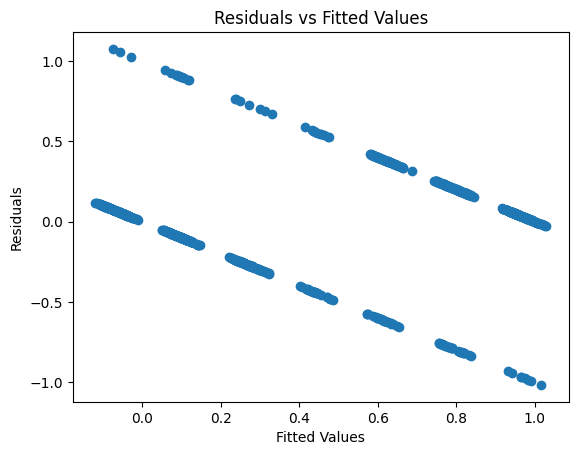

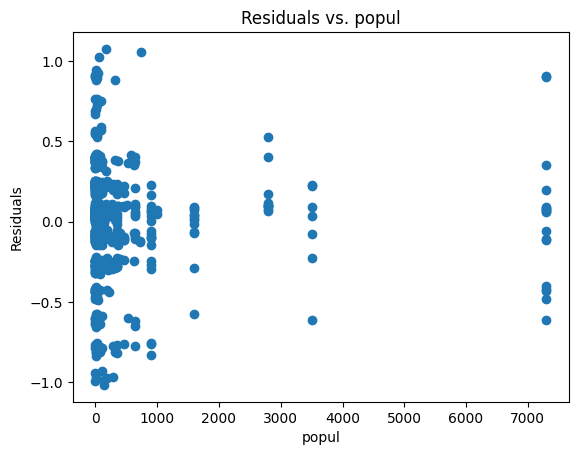

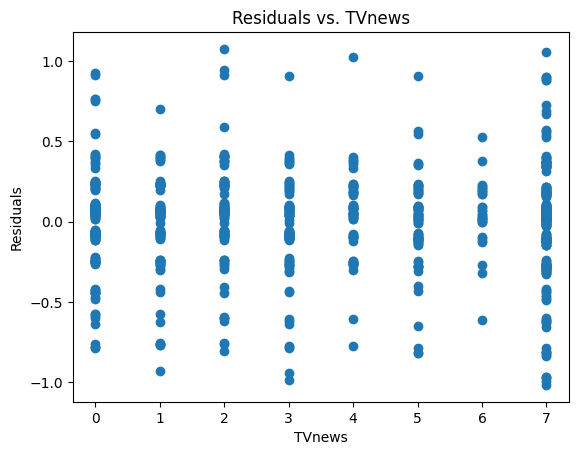

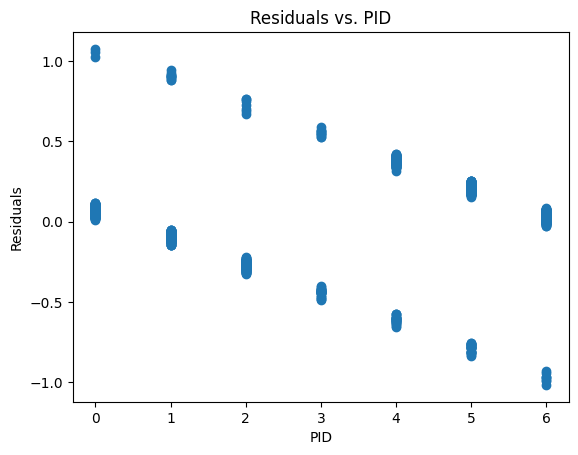

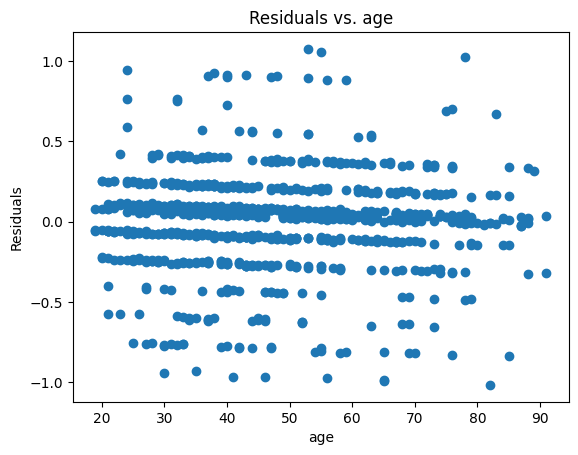

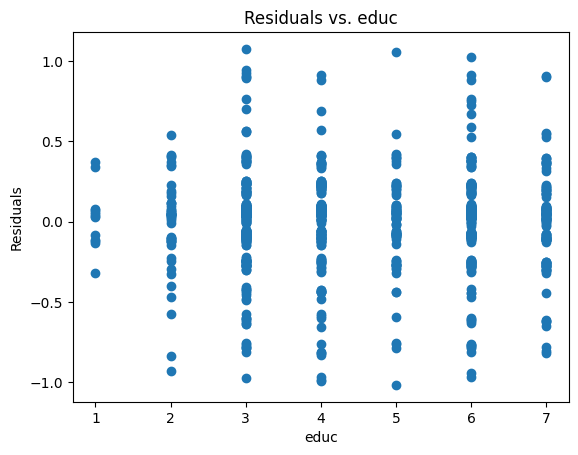

In [11]:
# First let's fit the OLS model
results = sm.OLS(y, X).fit()

# Now, let obtain the residuals
residuals = data['vote'] - results.predict(X)

# Let's check the pattern across the 'Residuals vs. Fitted Values'
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Now let's check the pattern across the 'Residuals vs. Independent variables'
for feature in selected_features:
    plt.scatter(data[feature], residuals)
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {feature}')
    plt.show()

It can be seen in both set of plots - 'residuals vs fitted values' and 'residuals vs. independent variables' - that the spread of the residuals is not constant across different levels of predicted values and there are some specific patterns or trends - the residuals are not scattered randomly. Therefore, I would choose assumption 2 - **Heteroskedastic**.

**Question 5:** Estimate the variance of these coefficients using the matrix formula.

**Solution:**
To estimate the variance of the coefficients, following is the matrix formula in the case of heteroskedasticity:

$$ Var(\hat{\beta}) = (X^TX)^{-1} X^T diag(\hat{e}^2) X (X^TX)^{-1}$$

In [12]:
# Let's fit the model with the robust standard errors
model_robust = sm.OLS(y, X).fit(cov_type = 'HC3')

# Now let's check how the variance of the coefficients look like
print("Variance-Covariance Matrix of Coefficients with Robust Standard Errors:")
print(model_robust.cov_HC3)

# Note to the Prof: I used Google and ChatGPT to understand the process of estimating variance of coefficients using the matrix formula for both the homoskedastic and heteroskedastic cases

Variance-Covariance Matrix of Coefficients with Robust Standard Errors:
[[ 1.93251179e-03 -9.87221696e-08 -2.17481470e-05 -1.39936151e-06
  -1.81042982e-05 -2.00679781e-04]
 [-9.87221696e-08  1.45379230e-10  4.74643899e-09  3.34879054e-09
  -8.66830034e-11  9.74651526e-09]
 [-2.17481470e-05  4.74643899e-09  1.63449035e-05  2.20078164e-06
  -9.72138212e-07  6.10984744e-08]
 [-1.39936151e-06  3.34879054e-09  2.20078164e-06  1.29025682e-05
  -2.33228394e-07 -4.58542505e-06]
 [-1.81042982e-05 -8.66830034e-11 -9.72138212e-07 -2.33228394e-07
   4.04120308e-07  7.76903013e-07]
 [-2.00679781e-04  9.74651526e-09  6.10984744e-08 -4.58542505e-06
   7.76903013e-07  3.77750060e-05]]


**Question 6:** Create a table showing, for each feature, j, the estimate $(\hat{\beta}_j)$, the standard error $\sqrt{\hat{Var}(\hat{\beta}_{jj})}$, and the upper and lower bounds of the 95% confidence interval $(\hat{\beta}_{j} \pm z_\alpha \sqrt{\hat{Var}(\hat{\beta}_{jj})})$. Compare the variance to what you got from statsmodels. What assumption are they using on the variance?
Note: you can get the constant $z_{1-\frac{\alpha}{2}}$ from scipy with scipy.stats.norm.ppf(0.975). This assumes that you have import scipy at the the top of your notebook with the rest of your imports.


**Solution:**

In [13]:
# First let's extract the coefficient estimates and standard errors
coefs = results.params
se = np.sqrt(np.diag(results.cov_params()))

# Now let's calculate the 95% confidence interval
alpha = 0.05
z_alpha = norm.ppf(1 - alpha / 2)
lower_bound = coefs - z_alpha * se
upper_bound = coefs + z_alpha * se

# Finally let's create our table
table = pd.DataFrame({
    'Features': X.columns,
    'Coefficient Estimate': coefs,
    'Standard Error': se,
    'Lower Bound (95% CI)': lower_bound,
    'Upper Bound (95% CI)': upper_bound,
})

# Let's print our table
print(table)

       Features  Coefficient Estimate  Standard Error  Lower Bound (95% CI)  \
const     const         -1.602317e-01        0.044969             -0.248369   
popul     popul          4.667631e-08        0.000009             -0.000018   
TVnews   TVnews          1.733595e-03        0.003975             -0.006058   
PID         PID          1.727703e-01        0.004310              0.164323   
age         age          1.356057e-03        0.000655              0.000072   
educ       educ          3.336629e-03        0.006171             -0.008757   

        Upper Bound (95% CI)  
const              -0.072095  
popul               0.000018  
TVnews              0.009525  
PID                 0.181218  
age                 0.002640  
educ                0.015431  


**Question 7:** Write a function with three arguments:
- beta: A 1D numpy array representing a particular value of your coefficients, $\beta$.
- label: A 1D numpy array of the labels in your dataset.
- features: A 2D numpy array representing the features in your dataset.

This function should output a single number, the negative log-likelihood evaluated at the chosen value of $\beta$.

**Solution:**

In [14]:
# Let's define our function:
def calculate_negative_log_likelihood(coefficients, labels, features):
    """
    Calculate the negative log-likelihood

    Parameters:
    - coefficients: Coefficient estimates
    - labels: Binary labels.
    - features: Feature matrix.

    Returns:
    - Negative log-likelihood value.
    """
    # Ensure coefficients and labels are NumPy arrays
    coefficients = np.array(coefficients)
    labels = np.array(labels)

    # Check if intercept is included in features, and add it if not
    if features.shape[1] == len(coefficients) - 1:
        features = np.insert(features, 0, 1, axis=1)

    # Calculate the linear combination of features and coefficients
    lin_comb = np.dot(features, coefficients)

    # Transform the raw scores into probabilities using the sigmoid function
    p_hat = 1 / (1 + np.exp(-lin_comb))
    
    # Ensure numerical stability by avoiding log(0) and log(1)
    p_hat = np.clip(p_hat, np.finfo(float).eps, 1 - np.finfo(float).eps)

    # Calculate negative log-likelihood
    nll = -np.sum(labels * np.log(p_hat) + (1 - labels) * np.log(1 - p_hat))

    return nll

# Note to the Prof: I used ChatGPT to understand and improve the function

In [15]:
negative_log_likelihood_value= calculate_negative_log_likelihood(coefficients, y, X)
print("Negative Log-Likelihood:", negative_log_likelihood_value)

Negative Log-Likelihood: 578.465643568713


**Question 8:** Using the SciPy library, minimize the objective function we discussed in class for logistics regression. 

**Solution:**

In [16]:
# Let's define the logistic function
def logistic_function(logits):
    return 1 / (1 + np.exp(-logits))

# Now, let's define the negative log-likelihood function
def nll(beta, X, y):
    # Calculate the predicted probabilities using the logistic function
    logits = np.dot(X, beta)
    probabilities = logistic_function(logits)

    # Calculate the negative log-likelihood
    negative_log_likelihood = -np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))

    return negative_log_likelihood

# Initial guess for the coefficients (all zeros)
initial_guess = np.zeros(X.shape[1])

# Minimize the negative log-likelihood function
opt_result = sc.optimize.minimize(nll, args=(X, y), x0=initial_guess, method='BFGS')

# Extract the estimated coefficients
beta_logistic = opt_result.x
beta_logistic

# Note to the Prof: I used ChatGPT to understand and improve the function

C:\Users\adity\AppData\Local\Temp\ipykernel_5648\1145316579.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-logits))
C:\Users\adity\AppData\Local\Temp\ipykernel_5648\1145316579.py:12: RuntimeWarning: divide by zero encountered in log
  negative_log_likelihood = -np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
C:\Users\adity\miniconda3\envs\ML_assignments\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\adity\AppData\Local\Temp\ipykernel_5648\1145316579.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-logits))
C:\Users\adity\AppData\Local\Temp\ipykernel_5648\1145316579.py:12: RuntimeWarning: divide by zero encountered in log
  negative_log_likelihood = -np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))


array([-5.14992740e+00, -1.96401554e-05,  1.11769410e-02,  1.22647313e+00,
        1.11724720e-02,  5.65363169e-02])

**Question 9:** Now you can construct your predictions by taking the dot-product between beta_logistic and your feature matrix and then passing that dot-product through the sigmoid function. This provides an estimate of the probability of class membership. Also calculate the most likely class for each unit by predicting a 1 when $ p(y_i|x_i;\beta) > 0.5 $ (i.e. the Heaviside function).

**Solution:**

In [17]:
# Let's first calculate logits
logits = np.dot(X, beta_logistic)

# Now, let's apply sigmoid function
probabilities = logistic_function(logits)

# Now, let's threshold to predict class
predicted_classes = (probabilities > 0.5).astype(int)

# Finally let's print the results
predictions = pd.DataFrame({
    'Logits': logits,
    'Probabilities': probabilities,
    'Predicted Class': predicted_classes
})

predictions.head()

,Logits,Probabilities,Predicted Class
0,2.858968,0.945780,1
1,-3.466414,0.030283,0
2,-3.238467,0.037744,0
3,-3.228330,0.038113,0
4,-3.985313,0.018247,0


**Question 10:** Construct class estimates for your OLS predictions as well by calculating 1$(X\beta_{ols} > 0.5)$ (i.e. output a 1 if the OLS predicted value is greater than 0.5).

**Solution:**

In [19]:
# Let's calculate OLS predictions
ols_predictions = np.dot(X, coefficients)

# Now, let's threshold to predict class
ols_predicted_classes = (ols_predictions > 0.5).astype(int)

# Let's print the results
ols_predictions_df = pd.DataFrame({
    'OLS Predictions': ols_predictions,
    'OLS Predicted Class': ols_predicted_classes
})

ols_predictions_df.head()

,OLS Predictions,OLS Predicted Class
0,0.947353,1
1,0.054749,0
2,0.077240,0
3,0.077466,0
4,-0.035835,0


**Question 11:** Calculate the full confusion matrix for the logistic regression and the OLS model.

Note: An easy way to construct a contingency table is by using a function in SciPy: scipy.stats.contingency.crosstab

**Solution:**

In [20]:
import scipy.stats as sc_stats

# Let's create the confusion matrix for logistic regression
confusion_log = sc_stats.contingency.crosstab(y, predicted_classes)

# Let's create the confusion matrix for OLS
confusion_matrix = sc_stats.contingency.crosstab(y, ols_predicted_classes)

# Now, let's display the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(confusion_log)

print("\nConfusion Matrix for OLS:")
print(confusion_matrix)

Confusion Matrix for Logistic Regression:
CrosstabResult(elements=(array([0., 1.]), array([0, 1])), count=array([[493,  58],
       [ 32, 361]]))

Confusion Matrix for OLS:
CrosstabResult(elements=(array([0., 1.]), array([0, 1])), count=array([[493,  58],
       [ 32, 361]]))


**Question 12:** Plot the relationship between the predictions from the linear regression in Question 1 (on the x-axis) and the predictions from the logistic regression (on the y-axis). What do you see?

**Solution:**

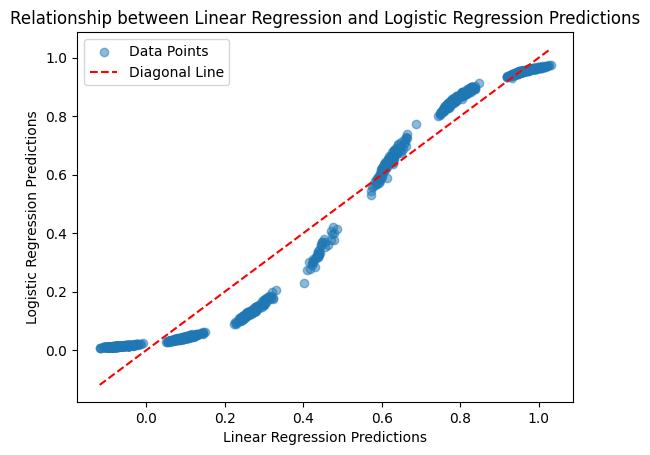

In [21]:
# Let's plot the relationship between linear regression predictions and logistic regression predictions
plt.scatter(ols_predictions, probabilities, alpha=0.5, label="Data Points")
plt.title("Relationship between Linear Regression and Logistic Regression Predictions")
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Logistic Regression Predictions")
plt.plot([min(ols_predictions), max(ols_predictions)], [min(ols_predictions), max(ols_predictions)], color='red', linestyle='--', label="Diagonal Line")
plt.legend()
plt.show()

For the following three questions, say whether they sound more like a supervised learning problem, an unsupervised learning problem or a reinforcement learning problem.

**Question 13:** Separating users into communities based on the kind of stories they engage with and other users they interact with.
m.

**Solution:** This is the case of an unsupervised learning because it involves grouping of users into communities based on their behavior instead of having predefined labels or categories for each user community. 

**Question 14:** Predicting whether users will click on the kind of stories they engage with and other users they interact with.

**Solution:** This is the case of a supervised learning because it involves the prediction of a binary outcome based on labeled examples of user behavior.

**Question 15:** Choosing which story to show a user in order to keep them active on the platform for longer.

**Solution:** This is the case of a reinforcement learning because here the the algorithm needs to learn over time which stories to show to users in order to maximize the reward of keeping the user active on the platform for longer. 